<a href="https://colab.research.google.com/github/2147118Joshua/Predicting-Exoplantes-using-TESS-data-/blob/main/Phase_folding%20and%20Binning%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# you need to first install the lightkurve module (this is only done for this notebook  - nothing is downloaded onto your computer)
# this might take a moment so just let it run
%matplotlib inline
!pip install lightkurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 247 kB 4.3 MB/s 
     |████████████████████████████████| 41 kB 170 kB/s 
     |████████████████████████████████| 4.5 MB 42.5 MB/s 
     |████████████████████████████████| 98 kB 4.4 MB/s 
     |████████████████████████████████| 832 kB 41.6 MB/s 
     |████████████████████████████████| 48 kB 5.5 MB/s 
     |████████████████████████████████| 4.0 MB 29.5 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11375 sha256=a8ef473c2fcb3102295b5918906166e7bdc16c49c6d16dcab4710045d3875b80
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50467 sha256=ef4b37bb36bc6c6688848f3ea23894d9359f34ab2894859e6c846b0a3c053d61
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995db

In [3]:
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy

In [4]:
TIC = 'TIC 55525572'  # !! CHANEG THIS to run code for a different TIC ID

In [6]:
print (lk.search_lightcurve(TIC, author = 'SPOC'))

SearchResult containing 24 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 04 2018   SPOC     120    55525572      0.0
  1 TESS Sector 05 2018   SPOC     120    55525572      0.0
  2 TESS Sector 06 2018   SPOC     120    55525572      0.0
  3 TESS Sector 08 2019   SPOC     120    55525572      0.0
  4 TESS Sector 09 2019   SPOC     120    55525572      0.0
  5 TESS Sector 10 2019   SPOC     120    55525572      0.0
  6 TESS Sector 11 2019   SPOC     120    55525572      0.0
  7 TESS Sector 12 2019   SPOC     120    55525572      0.0
  8 TESS Sector 13 2019   SPOC     120    55525572      0.0
  9 TESS Sector 27 2020   SPOC      20    55525572      0.0
...            ...  ...    ...     ...         ...      ...
 14 TESS Sector 30 2020   SPOC     120    55525572      0.0
 15 TESS Sector 31 2020   SPOC     120    55525572      0

In [5]:
# search the available data and select data from a couple of sectors 

'''
(this is a comment and not code - for longer comments you can use tripple quotation marks)

note, there are a number of ways to select what sectors you want to look at. First check what sectors are available using:

print (lk.search_lightcurve(TIC, author = 'SPOC'))

this will print the available sectors for a given target for you. You can then select them using: 

1. a range of sectors using'[start, end]': 'lk.search_lightcurve(TIC, author = 'SPOC')[0:9]'
2. listing the sectors you want: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = [5,6,8]'). (the square brackets are important!)
3. a single sector: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = 5')
4. the first available secor: 'lk.search_lightcurve(TIC, author = 'SPOC')[0]'
5. all of the available data: 'lk.search_lightcurve(TIC, author = 'SPOC')'

'''

available_data_select = lk.search_lightcurve(TIC, author = 'SPOC') # !! CHANEG THIS (see above)

# download the selected data and 'stitch' the data from the different sectors together
lc_collection = available_data_select.download_all().stitch()


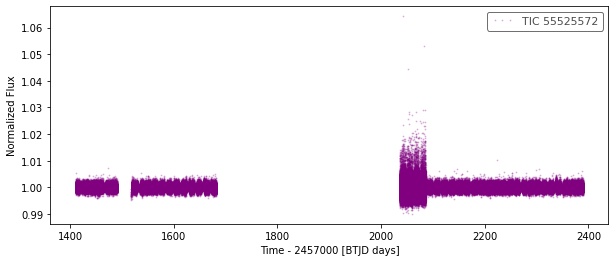

In [7]:
# plot the figure
fig, ax = plt.subplots(figsize = (10,4))

lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'purple', markersize = 1, alpha = 0.2)


# New section

In [ ]:
# for known systems you can look these parameters up on ExoFOP (https://exofop.ipac.caltech.edu/tess/)

period  = 3.72466 # !! CHANGE THIS. This is the time between transit events (duration of a year on this planet)
#t0 = 2674.522# !! CHANGE THIS. This is time of one of the transit events (is doesn't have to tbe the first one)
t0 = 2458792.85098 - 2457000
# NOTE: on ExoFOP the T0 is called 'epoch' and you need to subtract 2457000 from the value to get it into the right units!


In [ ]:
# use the lightkurve function .fold to phase fold the data (make sure to give it the period and t0)
lc_phased = lc_collection.fold(period = period, epoch_time = t0)

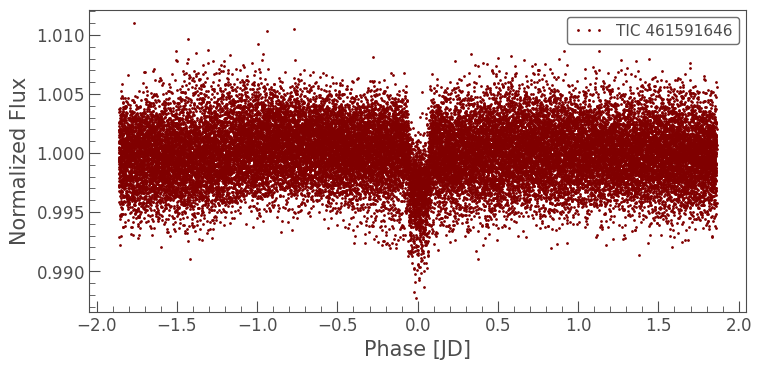

In [ ]:
# plot the phase folded data (the transit event is at phase = 0 so try zooming in on it to see it better)
lc_phased.plot(linewidth =0, color = 'maroon', marker = '.')

(0.996, 1.004)

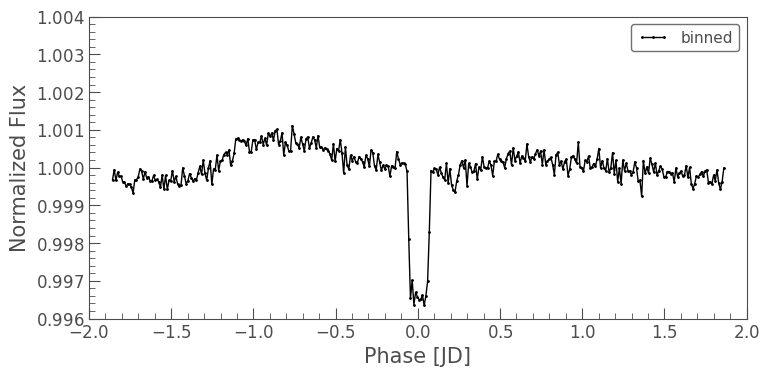

In [ ]:
# we can bin the phase folded data to make the transit more obvious (watch the episode on binning for more information on this)
lc_phased_binned = lc_phased.bin(15/24/60)
lc_phased_binned.plot(marker = 'o', linewidth = 1, color = 'k', alpha = 1, markersize = 1, label = 'binned')
plt.xlim(-2,2)
plt.ylim(0.996, 1.004)

In [ ]:
# plot both the binned and unbinned data on the same figure

#define a plotting region


ax = lc_phased.plot(marker = '.', linewidth = 0, color = 'b', alpha = 1, markersize = 2)
lc_phased_binned.plot(ax = ax, marker = 'o', linewidth = 1, color = 'k', alpha = 1, markersize = 3, label = 'Binned 15min')

# set x and y axis limits (for different targets these limits will be different!)
plt.xlim(-1,1)
plt.ylim(0.99, 1.004)
plt.title("Phased-Folded Plot, Period: 16.330 days, t0 = 2674.522")

Text(0.5, 1.0, 'Phased-Folded Plot, Period: 16.330 days, t0 = 2674.522')

(0.985, 1.008)

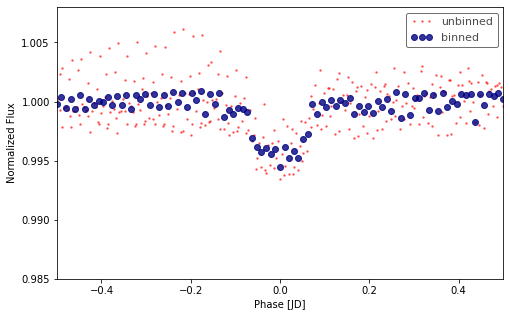

In [ ]:
# lets try this for a different target - I have added an '_2' to everything to seperate it from the previous example
# we'll do it in one cell but doing it in mutliple cells works just as well! 

# define a TIC ID
TIC = 'TIC 461591646'

# search what SPOC data for this target for sector 23 (for other targets first check what sectors are available)
sector_data_2 = lk.search_lightcurve(TIC, author = 'QLP', sector = 19)

# normalize the data
lc_2 = sector_data_2.download().normalize() #as we're only lookign at one sector we'll use the .normalize() function instead of the .stitch function

# define the pre-determined period and t0
period_2 = 3.72466
t0_2 = 2458792.85098 - 2457000 # this value is from ExoFOP so subtract 2457000 to get it in to the right units

# phase fold
lc_phased_2 = lc_2.fold(period = period_2, epoch_time = t0_2)

# bin the phase folded lightcurve
lc_phased_binned_2 = lc_phased_2.bin(15/24/60)


# --- plot the data ---

fig, ax = plt.subplots(figsize = (8,5))

lc_phased_2.plot(ax = ax, marker = '.', linewidth = 0, color = 'r', alpha = 0.5, markersize = 3, label = 'unbinned')
lc_phased_binned_2.plot(ax = ax, marker = 'o', linewidth = 0, color = 'navy', alpha = 0.8, markersize = 6, label = 'binned')

# set x and y axis limits (note that the limits need to be different from the previous example)
plt.xlim(-0.5,0.5)
plt.ylim(0.985, 1.008)